In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
main_dir = 'data/processed'
file_name = 'clustered_customer_segmentation_data.csv'
file_path = os.path.join(main_dir, file_name)

In [3]:
data = pd.read_csv(file_path)  # Ensure it has 'Cluster' labels

In [4]:
data.head()

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,New_York_Young_Adults,New_York_Middle-aged_Adults,Los_Angeles_Young_Adults,...,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Cluster,PCA1,PCA2
0,0.176471,0.639502,0.500000,0.842105,1.0,0.296296,0.333333,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,0.114511,1.263420
1,0.470588,0.333273,0.285714,0.578947,0.0,0.166667,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,-0.936885,-1.130093
2,1.000000,0.090102,0.142857,0.210526,1.0,0.611111,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1.596030,-0.081482
3,0.235294,0.964122,0.857143,0.894737,0.0,0.055556,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,-1.372312,0.988835
4,0.058824,0.279095,0.428571,0.526316,1.0,0.851852,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5,-0.679784,-0.930910


In [5]:
# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(data.drop(columns=['Cluster', 'PCA1', 'PCA2']), data['Cluster'])

In [6]:
# Read the optimal k from the file
with open("optimal_k.txt", "r") as file:
    k = int(file.read())

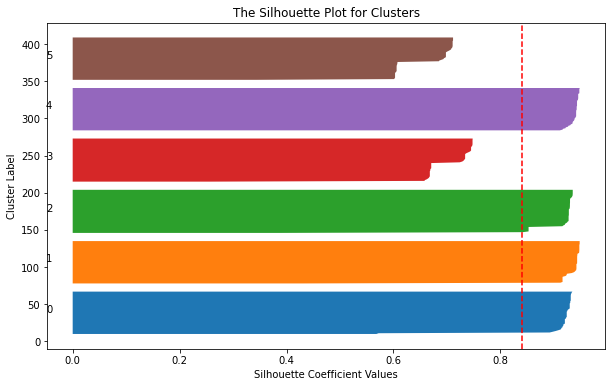

In [7]:
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_vals = silhouette_vals[data['Cluster'] == i]
    ith_cluster_silhouette_vals.sort()
    y_upper = y_lower + len(ith_cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples gap

plt.title("The Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.axvline(x=silhouette_vals.mean(), color="red", linestyle="--")
plt.show()

In [8]:
db_index = davies_bouldin_score(data.drop(columns=['Cluster', 'PCA1', 'PCA2']), data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.4028896840125582


In [9]:
ch_index = calinski_harabasz_score(data.drop(columns=['Cluster', 'PCA1', 'PCA2']), data['Cluster'])
print(f"Calinski-Harabasz Index: {ch_index}")

Calinski-Harabasz Index: 1078.2687967927773


In [10]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(data.drop(columns=['Cluster', 'PCA1', 'PCA2']))

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, n_init=10, random_state=42)

In [11]:
# Create a DataFrame for cluster centroids
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=data.drop(columns=['Cluster', 'PCA1', 'PCA2']).columns)
centroid_df['Cluster'] = range(k)
# print(centroid_df)

In [12]:
centroid_df.head()

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,New_York_Young_Adults,New_York_Middle-aged_Adults,Los_Angeles_Young_Adults,...,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Cluster
0,0.629817,0.032538,0.040640,0.101633,0.0,0.254789,0.034483,-2.775558e-17,4.163336e-17,-2.168404e-18,...,1.387779e-16,1.000000e+00,1.387779e-16,1.387779e-16,1.387779e-16,1.387779e-16,1.000000e+00,-1.665335e-16,-1.665335e-16,0
1,0.183570,0.945617,0.928571,0.951906,0.0,0.040230,0.333333,-2.775558e-17,4.163336e-17,-2.602085e-18,...,1.387779e-16,1.387779e-16,1.387779e-16,1.387779e-16,1.387779e-16,1.000000e+00,2.775558e-16,1.000000e+00,-1.665335e-16,1
2,0.477567,0.355802,0.334140,0.617306,0.0,0.116133,0.045198,-4.163336e-17,2.775558e-17,1.694915e-02,...,1.387779e-16,1.387779e-16,1.000000e+00,1.387779e-16,1.387779e-16,1.387779e-16,2.775558e-16,-1.110223e-16,1.000000e+00,2
3,0.277168,0.679920,0.590799,0.812667,1.0,0.288763,0.333333,4.237288e-01,5.762712e-01,-2.168404e-18,...,1.387779e-16,1.387779e-16,1.387779e-16,1.387779e-16,1.000000e+00,1.387779e-16,2.775558e-16,1.000000e+00,-1.110223e-16,3
4,0.942191,0.080305,0.172414,0.240472,1.0,0.582695,0.666667,-2.775558e-17,4.163336e-17,-2.168404e-18,...,1.000000e+00,1.387779e-16,1.387779e-16,1.387779e-16,1.387779e-16,1.387779e-16,1.000000e+00,-1.665335e-16,-1.665335e-16,4


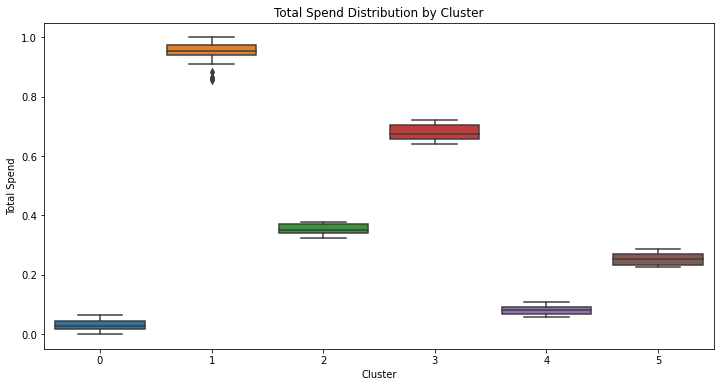

In [13]:
# Boxplot for a feature by cluster
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Total Spend', data=data)
plt.title('Total Spend Distribution by Cluster')
plt.show()